<a href="https://colab.research.google.com/github/filipecarbonera/Cars_Purchase_Decision/blob/main/car_purchase_decision_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando bibliotecas de análise, tratamento e visualização.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importando bibliotecas para aplicação e avaliação de ML.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [2]:
# Importando os dados.
dados = pd.read_csv('https://raw.githubusercontent.com/filipecarbonera/Cars_Purchase_Decision/main/car_data.csv')
dados.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


In [3]:
# Visualizando tipos de dados e valores faltantes.
print(dados.info())
print(dados.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None
User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


###EDA:
Como não há dados nulos, seguirei diretamente para a exploração dos dados.

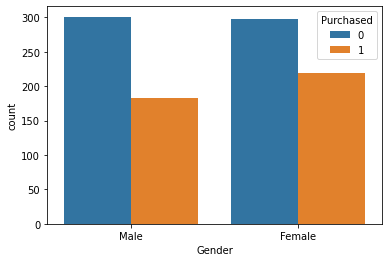

In [4]:
# Verificando o volume de aquisições em relação a cada gênero.
sns.countplot(data=dados, x='Gender', hue='Purchased')

Percebe-se que em termos gerais, mulheres adquirem mais veículos do que homens.

In [5]:
# Buscando ter uma visualização mais clara e consisa dos dados de idade, criei faixas etárias.

# Inicialmente verifico algumas estatisticas descritivas para compreender os dados.
print(dados['Age'].max())
print(dados['Age'].min())
print(dados['Age'].mean())

# Assim, crio as feixas etarias de tamanhos semelhantes para verificar o volume de cada uma.
Age_groups = pd.cut(x=dados['Age'], bins=[18,31,44,57,70])
Age_groups.value_counts()

63
18
40.106


(31, 44]    431
(44, 57]    261
(18, 31]    228
(57, 70]     75
Name: Age, dtype: int64

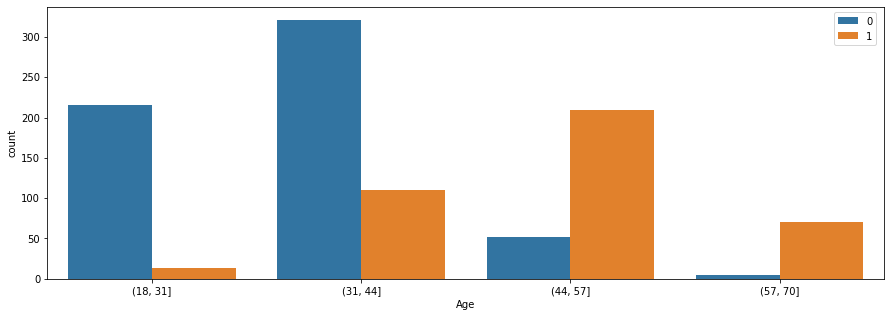

In [6]:
# Verifico então o volume de aquisições e não aquisições para cada faixa etária criada.
plt.figure(figsize=(15,5))
sns.countplot(data=dados, x=Age_groups, hue='Purchased')
plt.legend(bbox_to_anchor=(0.94, 0.98), loc='upper left', borderaxespad=0)

Observações:
- Tanto a faixa de 18 a 31, quanto de 31 a 44 tem muito mais chances de não adquirir um veículo.
- Em contrapartida, as faixas 44 a 57 e 57 a 70 tem muito mais chances de adquirir um veículo.

In [7]:
# Verifico e crio, então, faixas semelhantes de Salário Anual.
print(dados['AnnualSalary'].max())
print(dados['AnnualSalary'].min())
print(dados['AnnualSalary'].mean())

AnnualSalary_groups = pd.cut(x=dados['AnnualSalary'], bins=[15000,45000,75000, 105000, 135000, 175000])
AnnualSalary_groups.value_counts()

152500
15000
72689.0


(45000, 75000]      321
(75000, 105000]     245
(15000, 45000]      240
(105000, 135000]    116
(135000, 175000]     74
Name: AnnualSalary, dtype: int64

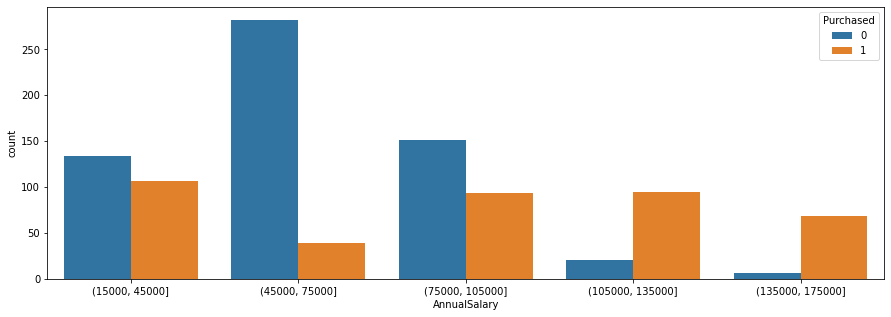

In [8]:
# Volume de aquisições e não aquisições por faixa de salário anual.
plt.figure(figsize=(15,5))
sns.countplot(data=dados, x=AnnualSalary_groups, hue='Purchased')

Observações:
- Chama atenção a faixa de quem ganha entre 45000 e 75000 ao ano. Destes, a maior chance é, significativamente, de não aquisição de um vículo.
- Apenas as duas faixas salariais mais altas, 105000 a 135000 e 135000 a 175000, tem maior chance de aquisição de um veículo.

In [9]:
# Adaptando do dataframe para rodar o modelo.
dados_modelo = dados[['Gender','Age','AnnualSalary','Purchased']]
dados_modelo.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


### MODELO SIMPLIFICADO

Com as observações sobre a chance de aquisição relacionadas a idade e salário anual levantei uma suspeita. Parecia relativamente nítida a divisão entre os que iriam adquirir e os que não iriam, considerando essas duas variáveis. Então plotei um gráfico que me ajudaria a confirmar tal hipótese.

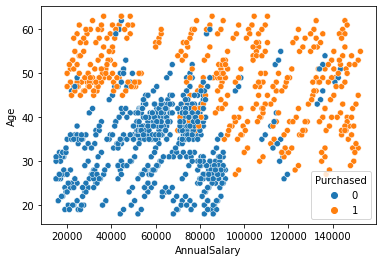

In [10]:
sns.scatterplot(data=dados_modelo, x="AnnualSalary", y="Age", hue="Purchased")

Com este gráfico, fica visível o cluster que **não** adquiriu um veículo:
- Pessoas com idade até 45 anos.
- Com salários anuais inferiores a 100000.

Poderiamos supor que os demais iriam adquirir um veículo.

Sendo assim, a clusterização ficaria da seguinte forma:

- **If "Age" <= 40 & AnnualSalary < 100000 then 0 else 1.**

In [11]:
# Criei então uma coluna calculada onde classifica com 1 apenas quem tem mais de 40 anos e tem salário anual acima de 100000, classificando os demais como 0.
dados_modelo['Previsao'] = np.where(dados_modelo['Age'] > 40, np.where(dados_modelo['AnnualSalary'] > 100000, 1, 0), 0)
dados_modelo

,Gender,Age,AnnualSalary,Purchased,Previsao
0,Male,35,20000,0,0
1,Male,40,43500,0,0
2,Male,49,74000,0,0
3,Male,40,107500,1,0
4,Male,25,79000,0,0
...,...,...,...,...,...
995,Male,38,59000,0,0
996,Female,47,23500,0,0
997,Female,28,138500,1,0
998,Female,48,134000,1,1


In [12]:
# Em seguida realizei a validação da previsão, ou seja, indiquei com 1 quando a previsão é igual a variável alvo e os demais indiquei com 0.
dados_modelo['validacao'] = np.where(dados_modelo['Purchased'] == dados_modelo['Previsao'],1,0)
print('Volume de acertos (1) e volumes de erros (0):')
dados_modelo['validacao'].value_counts()

Volume de acertos (1) e volumes de erros (0):


1    699
0    301
Name: validacao, dtype: int64

In [13]:
inteiros = dados_modelo['validacao'].value_counts()[1] / (dados_modelo['validacao'].value_counts()[1] + dados_modelo['validacao'].value_counts()[0])
percentual = "{:.2%}".format(inteiros)
print('Percentual de acerto do modelo simplificado:')
print(percentual)

Percentual de acerto do modelo simplificado:
69.90%


**Conclusão:**

Não foram necessárias técnicas avançadas de machine learning para alcançar uma acurácia de praticamente 70%. Apenas a observação do comportamento das variáveis trouxe insight relevantes para compreender a tendência nos dados.

É claro que, ao se lidar com uma quantidade maior de dados (o que é bastante comum) ou necessitar de uma acurácia mais elevada (acima de 90%, por exemplo), será necessária a aplicação de técnicas mais avançadas.

### MODELO DE MACHINE LEARNING:
Passo então a focar meus esforços na aplicação de um algorítmo de machine learning para melhorar a acurácia nas previsões.

In [14]:
# Adaptação da coluna Gênero para rodar o modelo.
dados_modelo['Gender'] = np.where(dados_modelo['Gender'] == 'Male', 1, dados_modelo['Gender'])
dados_modelo['Gender'] = np.where(dados_modelo['Gender'] == 'Female', 0, dados_modelo['Gender'])
dados_modelo['Gender'].value_counts()

0    516
1    484
Name: Gender, dtype: int64

In [15]:
# Dividindo os dados entre a variável alvo (y) e as demais features (X).
X = dados_modelo[['Gender','Age','AnnualSalary']]
y = dados['Purchased']

In [16]:
# Dividindo os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

# Instanciando o modelo.
modelo = DecisionTreeClassifier()

# Ajustando o modelo aos dados.
fit = modelo.fit(X_train, y_train)

# Realizando previsão com os dados de teste.
result = fit.predict(X_test)

# Visualizando a previsão.
result

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [17]:
s_result = pd.DataFrame(result)
s_result

,0
0,0
1,0
2,1
3,0
4,0
...,...
395,0
396,0
397,0
398,1


In [18]:
compare = s_result.reset_index(drop=True).merge(y_test.reset_index(drop=True), left_index=True, right_index=True)
compare['validacao'] = np.where(compare['Purchased'] == compare[0],1,0)
compare['validacao'].value_counts()
inteiros = compare['validacao'].value_counts()[1] / (compare['validacao'].value_counts()[1] + compare['validacao'].value_counts()[0])
percentual = "{:.2%}".format(inteiros)
print('Percentual de acerto do modelo de Machine Learning:')
print(percentual)

Percentual de acerto do modelo de Machine Learning:
86.25%


**Conclusão:** Se comparado com os 69.90% do modelo simplificado criado anteriormente, o modelo de machine learning mostra um índice de acertividade muito maior, com 88,75%.